In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
%matplotlib inline

In [3]:
A = ["R","P","S"] # Actions
K = 2 # Memory length

In [4]:
def Win(X,Y): # Determine if X beats Y
    if X == 'R' and Y == 'S':
        return True
    if X == 'S' and Y == 'P':
        return True
    if X == 'P' and Y == 'R':
        return True
    return False

In [5]:
# Returns a list [R, P, S] with the total number of times each
# acion has been performed after the given state
def Nb(Hist, State):
    R = P = S = 0
    for i in range(K,len(Hist)):
        if Hist[i-K:i] == State:
            R += (Hist[i][0] == 'R')
            P += (Hist[i][0] == 'P')
            S += (Hist[i][0] == 'S')
    return {"R":R, "P":P, "S":S}

TestHist = [['R','P'],['R','S'],['P','P'],['R','S'],['S','S'],['R','P'],['R','S'],['P','P'],['S','S'],['S','S']]
TestState = [['R','S'],['P','P']]

print(Nb(TestState,TestHist))

{'R': 0, 'P': 0, 'S': 0}


In [6]:
# Q estimator
def Q(Hist, State):
    R = P = S = 0
    for i in range(K,len(Hist)):
        if Hist[i-K:i] == State:
            if Win(Hist[i][0], Hist[i][1]): # first lign: algorithm
                R += (Hist[i][0] == 'R')
                P += (Hist[i][0] == 'P')
                S += (Hist[i][0] == 'S')
    return {"R":R, "P":P, "S":S}

TestHist = [['R','P'],['R','S'],['P','P'],['R','S'],['S','S'],['R','P'],['R','S'],['P','P'],['S','S'],['S','S']]
TestState = [['R','S'],['P','P']]

print(Q(TestHist,TestState))

{'R': 1, 'P': 0, 'S': 0}


In [7]:
# Return "R","P","S" with probabilities p,q,r
def RandomPlay(p,q,r):
    x = random.uniform(0,1)
    if x<p:
        return 'R'
    elif x<p+q:
        return 'P'
    else:
        return 'S'

In [8]:
# Receives a dict of the form {R: N_R, P: N_P, S: N_S}
# Returns one of the keys with maximal value with equal probability
def ArgMax(s):
    R = s['R']
    P = s['P']
    S = s['S']
    if R > P and R > S:
        return "R"
    elif P > R and P > S:
        return "P"
    elif S > P and S > R:
        return "S"
    elif R == P and R == S:
        return RandomPlay(1/3,1/3,1/3)
    elif R == P:
        r = random.random()
        if r > 0.5:
            return "R"
        else:
            return "P"
    elif R == S:
        r = random.random()
        if r > 0.5:
            return "R"
        else:
            return "S"
    elif S == P:
        r = random.random()
        if r > 0.5:
            return "S"
        else:
            return "P"

In [9]:
# e-greedy step
def e_greedy(Hist,eps):
    x = random.uniform(0,1)
    if x>eps:
        return ArgMax(Q(Hist, Hist[-K:]))
    else:
        return RandomPlay(1/3,1/3,1/3)

TestHist = [['R','P'],['R','S'],['P','P'],['P','R'],['P','P'],['R','S'],['P','P'],['P','R'],['R','P'],['R','S'],['P','P']]
print(e_greedy(TestHist, 0.1))

P


In [10]:
# Optimal answer for a given policy
def OptimalAnswer(p,q,r):
    m = max(r-q, p-r, q-p)
    x = (int)(m == r-q)
    y = (int)(m == p-r)
    z = (int)(m == q-p)
    return (x,y,z)

# Regret of taking an action given a policy
def Regret(Action, pol):
    if Action == "R" and OptimalAnswer(pol[0],pol[1],pol[2])[0] == 1:
        return 0
    elif Action == "P" and OptimalAnswer(pol[0],pol[1],pol[2])[1] == 1:
        return 0
    elif Action == "S" and OptimalAnswer(pol[0],pol[1],pol[2])[2] == 1:
        return 0
    else:
        return 1

In [11]:
# Simulation with constant e-greedy
# Opponent adopts a simple policy: play rock, paper or scissors
# with probabilitites 0.1, 0.2 or 0.7, respectively

N = 10000

Hist = []
Hist.append([RandomPlay(1/3,1/3,1/3),RandomPlay(1/3,1/3,1/3)])
Hist.append([RandomPlay(1/3,1/3,1/3),RandomPlay(1/3,1/3,1/3)])

eps = 0.2
pol = [0.1,0.2,0.7]

for i in range(N):
    choice_x = e_greedy(Hist,eps)
    choice_y = RandomPlay(pol[0],pol[1],pol[2])
    Hist.append([choice_x,choice_y])
    
Wins = np.zeros(N)
Regrets = np.zeros(N)
for i in range(N):
    Wins[i] = Win(Hist[i][0],Hist[i][1])
    Regrets[i] = Regret(Hist[i][0],pol)
Wins = np.cumsum(Wins)/[i+1 for i in range(N)]
Total_regret = np.cumsum(Regrets)

Text(0, 0.5, 'Regret total')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


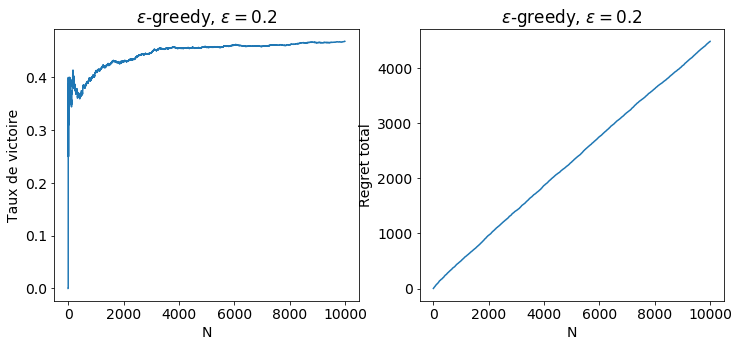

In [12]:
# Plot victory rate and regret

import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

plt.figure(figsize=(12,5)) 

plt.subplot(1, 2, 1)
plt.plot(Wins)
plt.title("$\epsilon$-greedy, $\epsilon = 0.2$")
plt.xlabel('N')
plt.ylabel('Taux de victoire')

plt.subplot(1, 2, 2)
plt.plot(Total_regret)
plt.title("$\epsilon$-greedy, $\epsilon = 0.2$")
plt.xlabel('N')
plt.ylabel('Regret total')

In [13]:
# Simulation with constant 100/n e-greedy
# Opponent adopts a simple policy: play rock, paper or scissors
# with probabilitites 0.1, 0.2 or 0.7, respectively

N = 10000

Hist = []
Hist.append([RandomPlay(1/3,1/3,1/3),RandomPlay(1/3,1/3,1/3)])
Hist.append([RandomPlay(1/3,1/3,1/3),RandomPlay(1/3,1/3,1/3)])

pol = [0.1,0.2,0.7]

for i in range(N):
    eps = 100/(i+1)
    # State = Hist[-K:]
    choice_x = e_greedy(Hist,eps)
    choice_y = RandomPlay(pol[0],pol[1],pol[2])
    Hist.append([choice_x,choice_y])
    
Wins = np.zeros(N)
Regrets = np.zeros(N)
for i in range(N):
    Wins[i] = Win(Hist[i][0],Hist[i][1])
    Regrets[i] = Regret(Hist[i][0],pol)
Wins = np.cumsum(Wins)/[i+1 for i in range(N)]
Total_regret = np.cumsum(Regrets)

Text(0, 0.5, 'Regret total (log)')

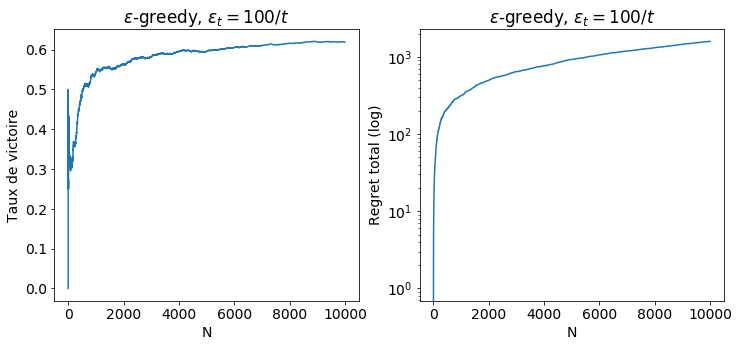

In [14]:
# Plot victory rate and regret

plt.figure(figsize=(12,5)) 

plt.subplot(1, 2, 1)
plt.plot(Wins)
plt.title("$\epsilon$-greedy, $\epsilon_t = 100/t$")
plt.xlabel('N')
plt.ylabel('Taux de victoire')

plt.subplot(1, 2, 2)
plt.yscale('log')
plt.plot(Total_regret)
plt.title("$\epsilon$-greedy, $\epsilon_t = 100/t$")
plt.xlabel('N')
plt.ylabel('Regret total (log)')

In [15]:
# UCB algorithm

def U(Hist):
    n = Nb(Hist, Hist[-K:])
    t = len(Hist)
    return {"R": Q(Hist, Hist[-K:])["R"] + math.sqrt(2*math.log(t)/(max(n["R"],1))),
            "P": Q(Hist, Hist[-K:])["P"] + math.sqrt(2*math.log(t)/(max(n["P"],1))),
            "S": Q(Hist, Hist[-K:])["S"] + math.sqrt(2*math.log(t)/(max(n["S"],1)))}

def UCB(Hist,eps):
    return ArgMax(U(Hist))

TestHist = [['R','P'],['R','S'],['P','P'],['P','R'],['P','P'],['R','S'],['P','P'],['P','R'],['R','P'],['R','S'],['P','P']]
print(UCB(TestHist, 0.1))

P


In [16]:
# Simulation of UCB
# Opponent adopts a simple policy: play rock, paper or scissors
# with probabilitites 0.1, 0.2 or 0.7, respectively

N = 2000

Hist = []
Hist.append([RandomPlay(1/3,1/3,1/3),RandomPlay(1/3,1/3,1/3)])
Hist.append([RandomPlay(1/3,1/3,1/3),RandomPlay(1/3,1/3,1/3)])

eps = 0.1
pol = [0.1,0.2,0.7]

for i in range(N):
    # State = Hist[-K:]
    choice_x = UCB(Hist,eps)
    choice_y = RandomPlay(pol[0],pol[1],pol[2])
    Hist.append([choice_x,choice_y])
    
Wins = np.zeros(N)
Regrets = np.zeros(N)
for i in range(N):
    Wins[i] = Win(Hist[i][0],Hist[i][1])
    Regrets[i] = Regret(Hist[i][0],pol)
Wins = np.cumsum(Wins)/[i+1 for i in range(N)]
Total_regret = np.cumsum(Regrets)

Text(0, 0.5, 'Regret total (log)')

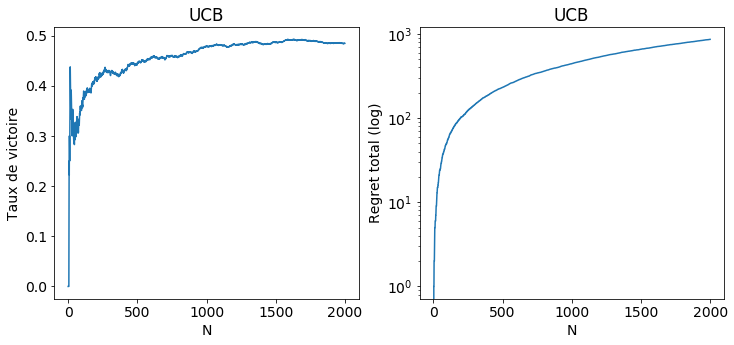

In [17]:
# Plot victory rate and regret

plt.figure(figsize=(12,5)) 

plt.subplot(1, 2, 1)
plt.plot(Wins)
plt.title("UCB")
plt.xlabel('N')
plt.ylabel('Taux de victoire')

plt.subplot(1, 2, 2)
plt.yscale('log')
plt.plot(Total_regret)
plt.title("UCB")
plt.xlabel('N')
plt.ylabel('Regret total (log)')